In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency, fisher_exact
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the data
df = pd.read_csv('anonim-fake.csv')


Contingency table for eroziuni:
evoluție_binary  0.0  1.0
eroziuni                 
0                 20   67
1                 22   81
Chi-square test p-value: 0.9250


<Figure size 1000x600 with 0 Axes>

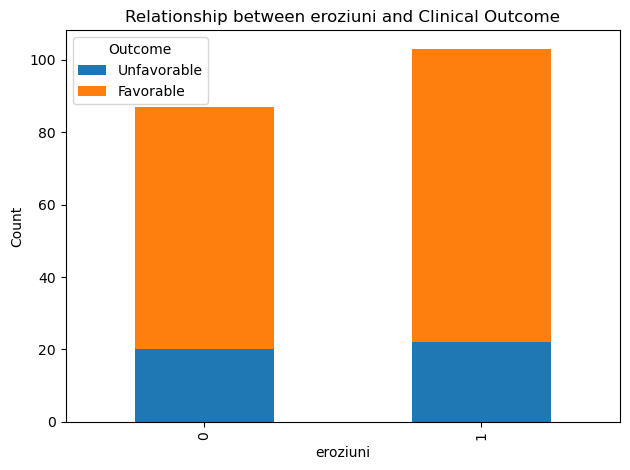


Contingency table for tasări:
evoluție_binary  0.0  1.0
tasări                   
0                 28  108
1                 14   40
Chi-square test p-value: 0.5446


<Figure size 1000x600 with 0 Axes>

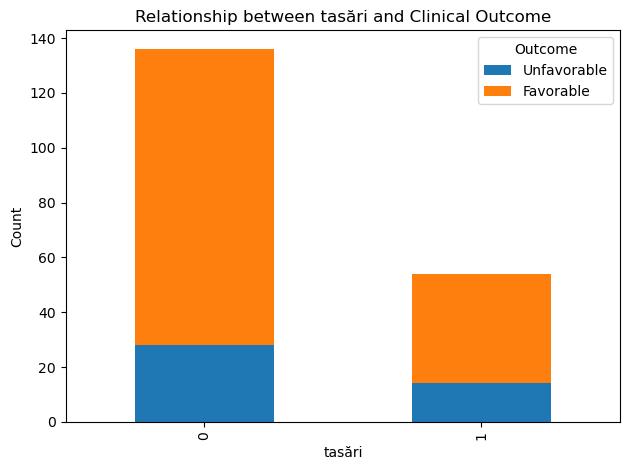


Contingency table for edem:
evoluție_binary  0.0  1.0
edem                     
0                 24   69
1                 18   79
Chi-square test p-value: 0.3035


<Figure size 1000x600 with 0 Axes>

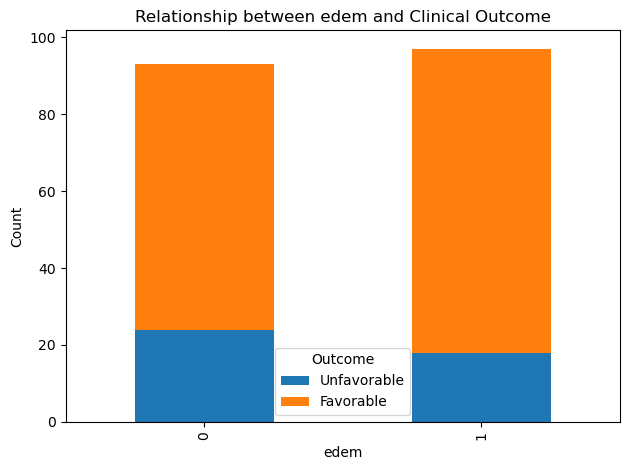


Contingency table for colecții:
evoluție_binary  0.0  1.0
colecții                 
0                 20   93
1                 22   55
Chi-square test p-value: 0.1107


<Figure size 1000x600 with 0 Axes>

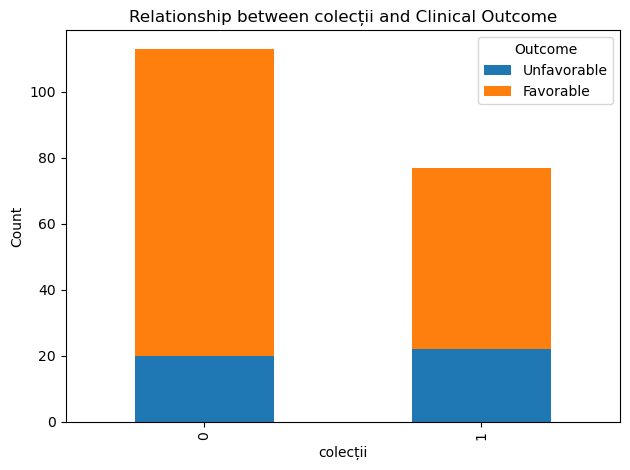


Contingency table for stenoză:
evoluție_binary  0.0  1.0
stenoză                  
0                 30  114
1                 12   34
Chi-square test p-value: 0.5868


<Figure size 1000x600 with 0 Axes>

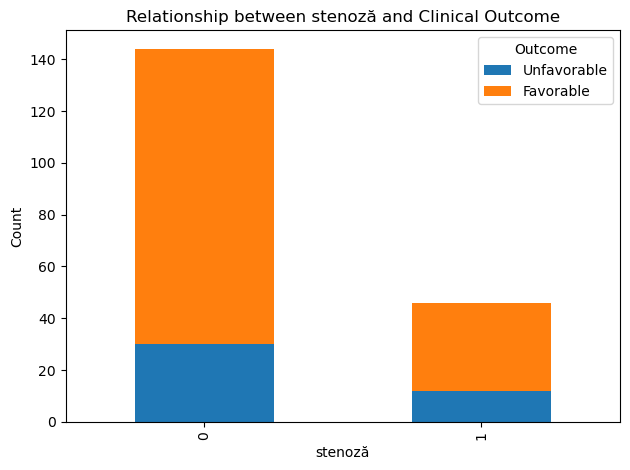

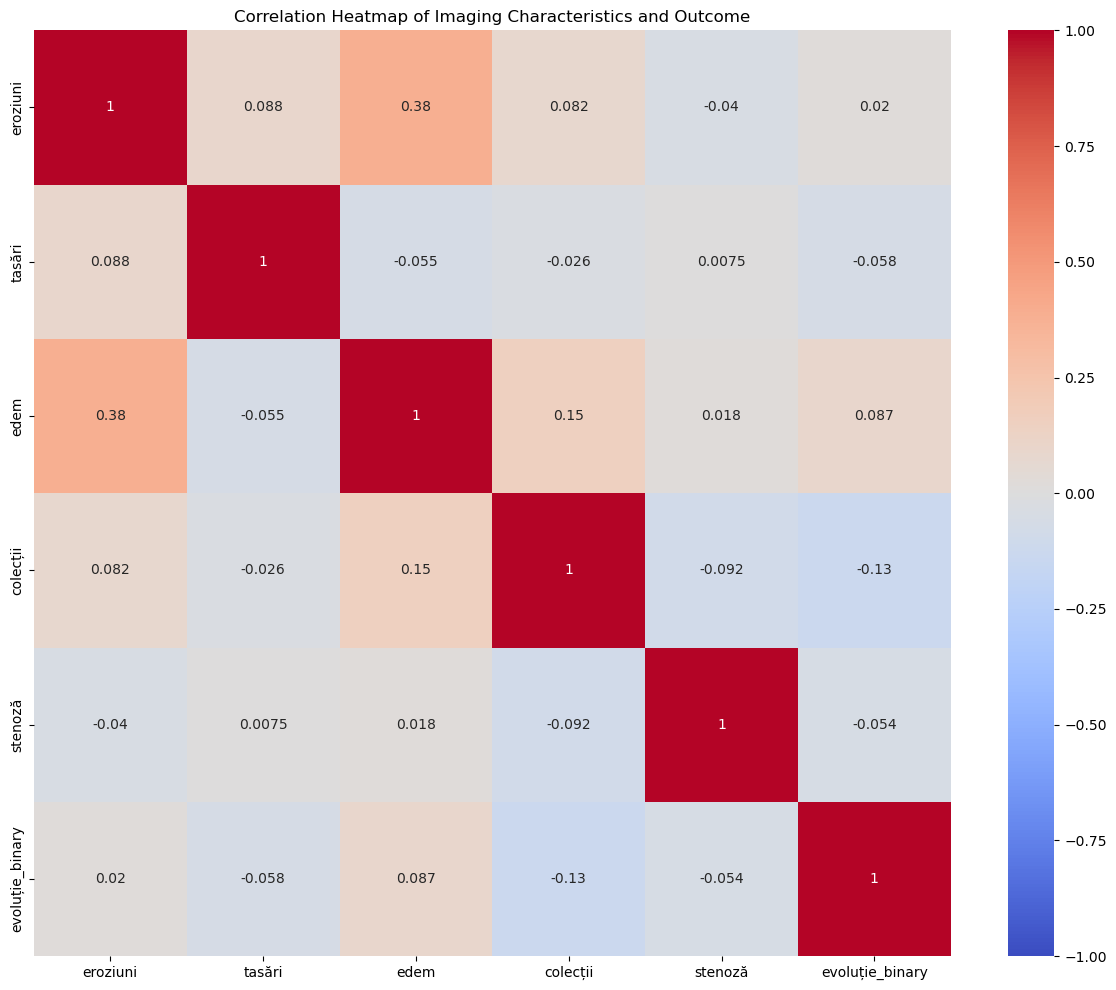


Contingency table for eroziuni and antibiotic_treatment:
antibiotic_treatment   0    1
eroziuni                     
0                     11   76
1                      9  100
Chi-square test p-value: 0.4410


<Figure size 1000x600 with 0 Axes>

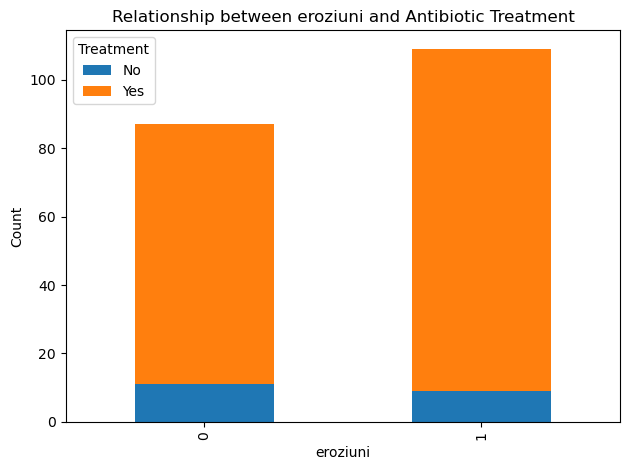


Contingency table for tasări and antibiotic_treatment:
antibiotic_treatment   0    1
tasări                       
0                     12  128
1                      8   48
Chi-square test p-value: 0.3509


<Figure size 1000x600 with 0 Axes>

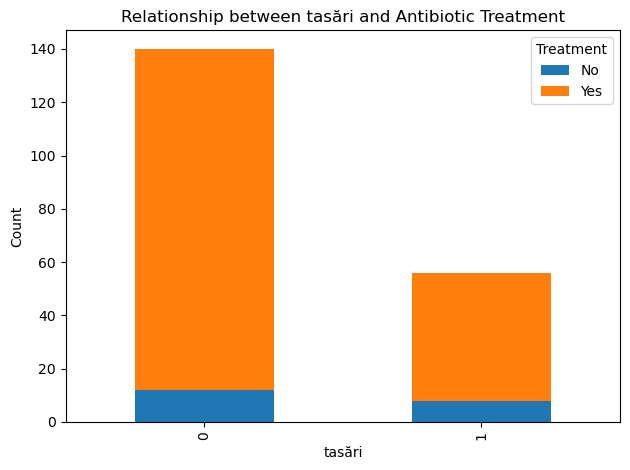


Contingency table for edem and antibiotic_treatment:
antibiotic_treatment   0   1
edem                        
0                     14  79
1                      6  97
Chi-square test p-value: 0.0581


<Figure size 1000x600 with 0 Axes>

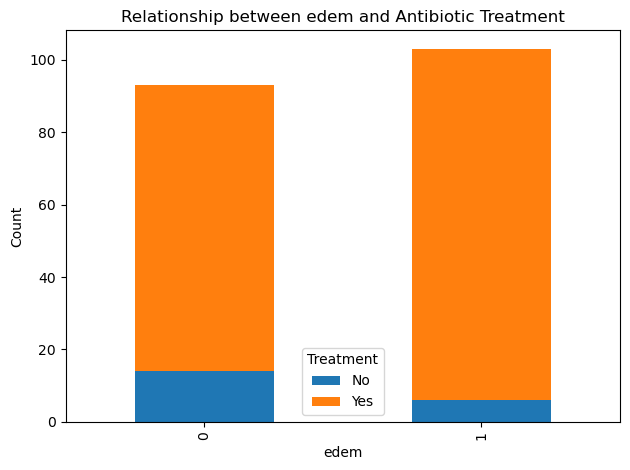


Contingency table for colecții and antibiotic_treatment:
antibiotic_treatment   0    1
colecții                     
0                     15  100
1                      5   76
Chi-square test p-value: 0.1851


<Figure size 1000x600 with 0 Axes>

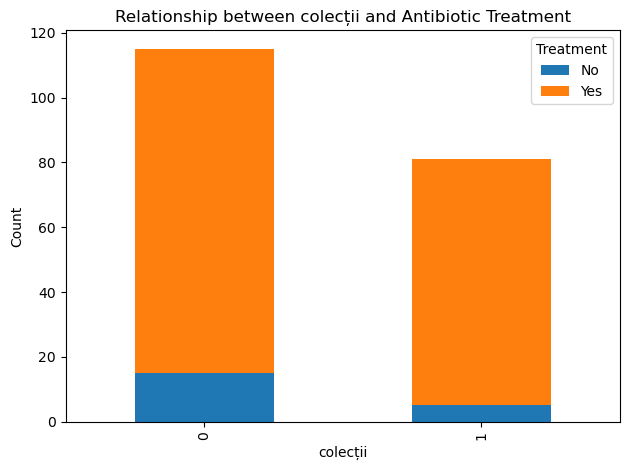


Contingency table for stenoză and antibiotic_treatment:
antibiotic_treatment   0    1
stenoză                      
0                     15  133
1                      5   43
Chi-square test p-value: 1.0000


<Figure size 1000x600 with 0 Axes>

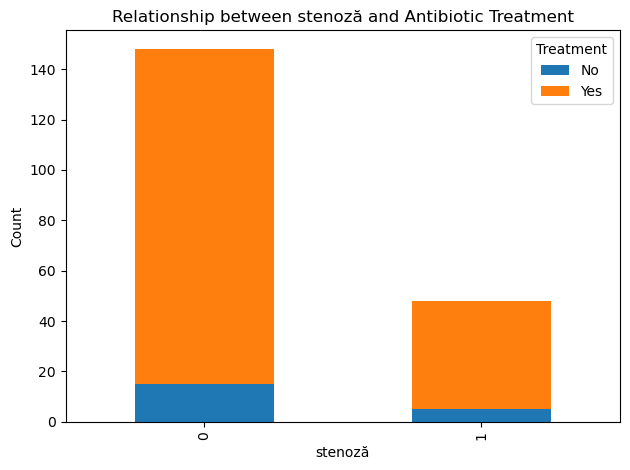


Contingency table for eroziuni and surgical_treatment:
surgical_treatment   0   1
eroziuni                  
0                   26  61
1                   46  63
Chi-square test p-value: 0.1035


<Figure size 1000x600 with 0 Axes>

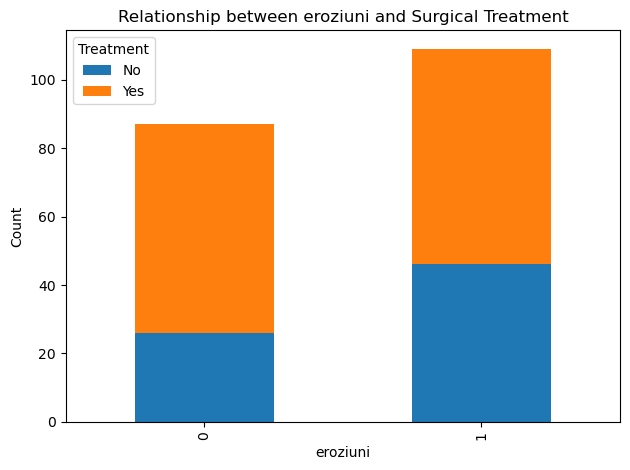


Contingency table for tasări and surgical_treatment:
surgical_treatment   0   1
tasări                    
0                   54  86
1                   18  38
Chi-square test p-value: 0.4969


<Figure size 1000x600 with 0 Axes>

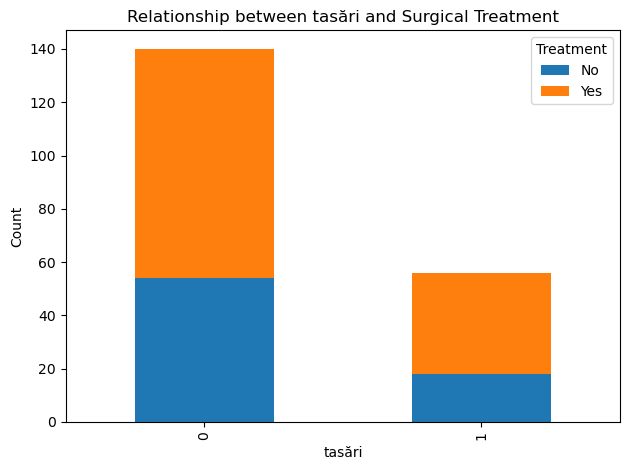


Contingency table for edem and surgical_treatment:
surgical_treatment   0   1
edem                      
0                   26  67
1                   46  57
Chi-square test p-value: 0.0230


<Figure size 1000x600 with 0 Axes>

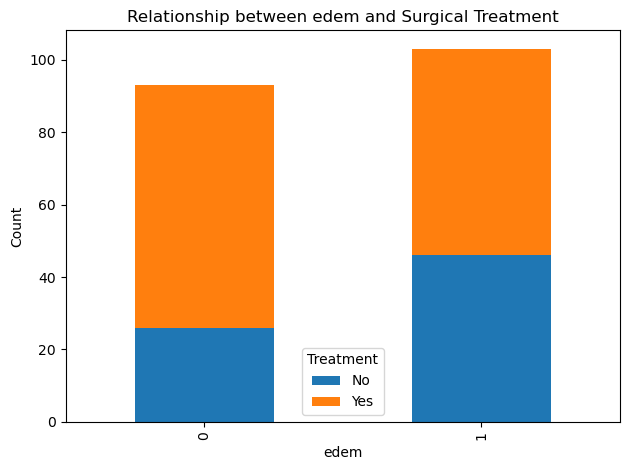


Contingency table for colecții and surgical_treatment:
surgical_treatment   0   1
colecții                  
0                   41  74
1                   31  50
Chi-square test p-value: 0.8227


<Figure size 1000x600 with 0 Axes>

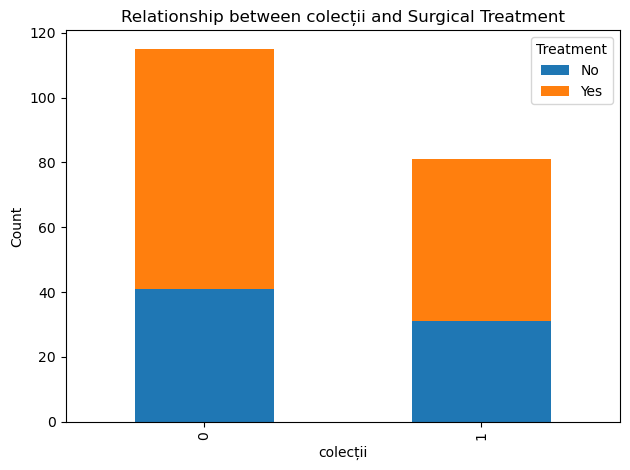


Contingency table for stenoză and surgical_treatment:
surgical_treatment   0   1
stenoză                   
0                   54  94
1                   18  30
Chi-square test p-value: 1.0000


<Figure size 1000x600 with 0 Axes>

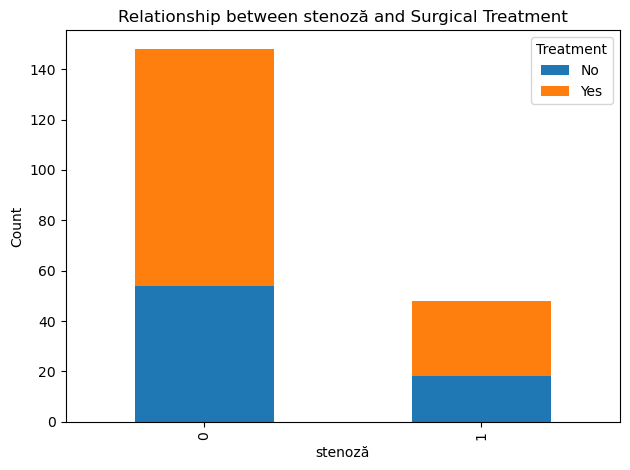

In [3]:
# Data Preprocessing
# Convert 'evoluție' to binary (0 for unfavorable, 1 for favorable)
df['evoluție_binary'] = df['evoluție'].map({'favorabilă': 1, 'lent_favorabilă': 1, 'nefavorabilă': 0})

# Extract imaging characteristics
imaging_chars = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză']
for char in imaging_chars:
    df[char] = df['caracteristici imagistice'].str.contains(char, na=False).astype(int)

# Function to perform Chi-square or Fisher's exact test
def contingency_test(feature, outcome):
    contingency = pd.crosstab(df[feature], df[outcome])
    if (contingency.values < 5).any():
        _, p_value = fisher_exact(contingency)
        test_type = "Fisher's exact test"
    else:
        _, p_value, _, _ = chi2_contingency(contingency)
        test_type = "Chi-square test"
    return contingency, p_value, test_type

# Analyze the relationship between imaging characteristics and clinical outcome
for char in imaging_chars:
    contingency, p_value, test_type = contingency_test(char, 'evoluție_binary')
    print(f"\nContingency table for {char}:")
    print(contingency)
    print(f"{test_type} p-value: {p_value:.4f}")

    # Visualize the relationship
    plt.figure(figsize=(10, 6))
    contingency.plot(kind='bar', stacked=True)
    plt.title(f'Relationship between {char} and Clinical Outcome')
    plt.xlabel(char)
    plt.ylabel('Count')
    plt.legend(title='Outcome', labels=['Unfavorable', 'Favorable'])
    plt.tight_layout()
    plt.show()

# Heatmap of imaging characteristics
plt.figure(figsize=(12, 10))
sns.heatmap(df[imaging_chars + ['evoluție_binary']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Imaging Characteristics and Outcome')
plt.tight_layout()
plt.show()

# # Logistic Regression
# # Drop rows with NaN values in 'evoluție_binary'
# df = df.dropna(subset=['evoluție_binary'])

# # Proceed with the existing code
# X = df[imaging_chars]
# y = df['evoluție_binary']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Print model coefficients
# for feature, coef in zip(imaging_chars, model.coef_[0]):
#     print(f"{feature}: {coef:.4f}")

# # Model evaluation
# y_pred = model.predict(X_test)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Analyze biological parameters
# bio_params = ['crp (0 - 1 mg/dl)', 'vsh (5 - 10 mm/h)', 'wbc * 10*3/ul (3.6 - 11.8)']

# for param in bio_params:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='evoluție', y=param, data=df)
#     plt.title(f'Distribution of {param} by Clinical Outcome')
#     plt.tight_layout()
#     plt.show()

#     # Perform Tukey's HSD test
#     tukey = pairwise_tukeyhsd(df[param], df['evoluție'])
#     print(f"\nTukey's HSD test for {param}:")
#     print(tukey)

# Additional analysis: Treatment decisions based on imaging
df['antibiotic_treatment'] = df['tratament'].str.contains('antibioterapie').astype(int)
df['surgical_treatment'] = df['tratament'].str.contains('chirurgical').astype(int)

for treatment in ['antibiotic_treatment', 'surgical_treatment']:
    for char in imaging_chars:
        contingency, p_value, test_type = contingency_test(char, treatment)
        print(f"\nContingency table for {char} and {treatment}:")
        print(contingency)
        print(f"{test_type} p-value: {p_value:.4f}")

        # Visualize the relationship
        plt.figure(figsize=(10, 6))
        contingency.plot(kind='bar', stacked=True)
        plt.title(f'Relationship between {char} and {treatment.replace("_", " ").title()}')
        plt.xlabel(char)
        plt.ylabel('Count')
        plt.legend(title='Treatment', labels=['No', 'Yes'])
        plt.tight_layout()
        plt.show()

Tabel comasat de contingență:
  Caracteristică  Absent & Nefavorabil  Absent & Favorabil  \
0       eroziuni                    20                  67   
1         tasări                    28                 108   
2           edem                    24                  69   
3       colecții                    20                  93   
4        stenoză                    30                 114   

   Prezent & Nefavorabil  Prezent & Favorabil  
0                     22                   81  
1                     14                   40  
2                     18                   79  
3                     22                   55  
4                     12                   34  

Rezultate teste statistice:
  Caracteristică             Test   p-value
0       eroziuni  Chi-square test  0.924957
1         tasări  Chi-square test  0.544571
2           edem  Chi-square test  0.303490
3       colecții  Chi-square test  0.110708
4        stenoză  Chi-square test  0.586801


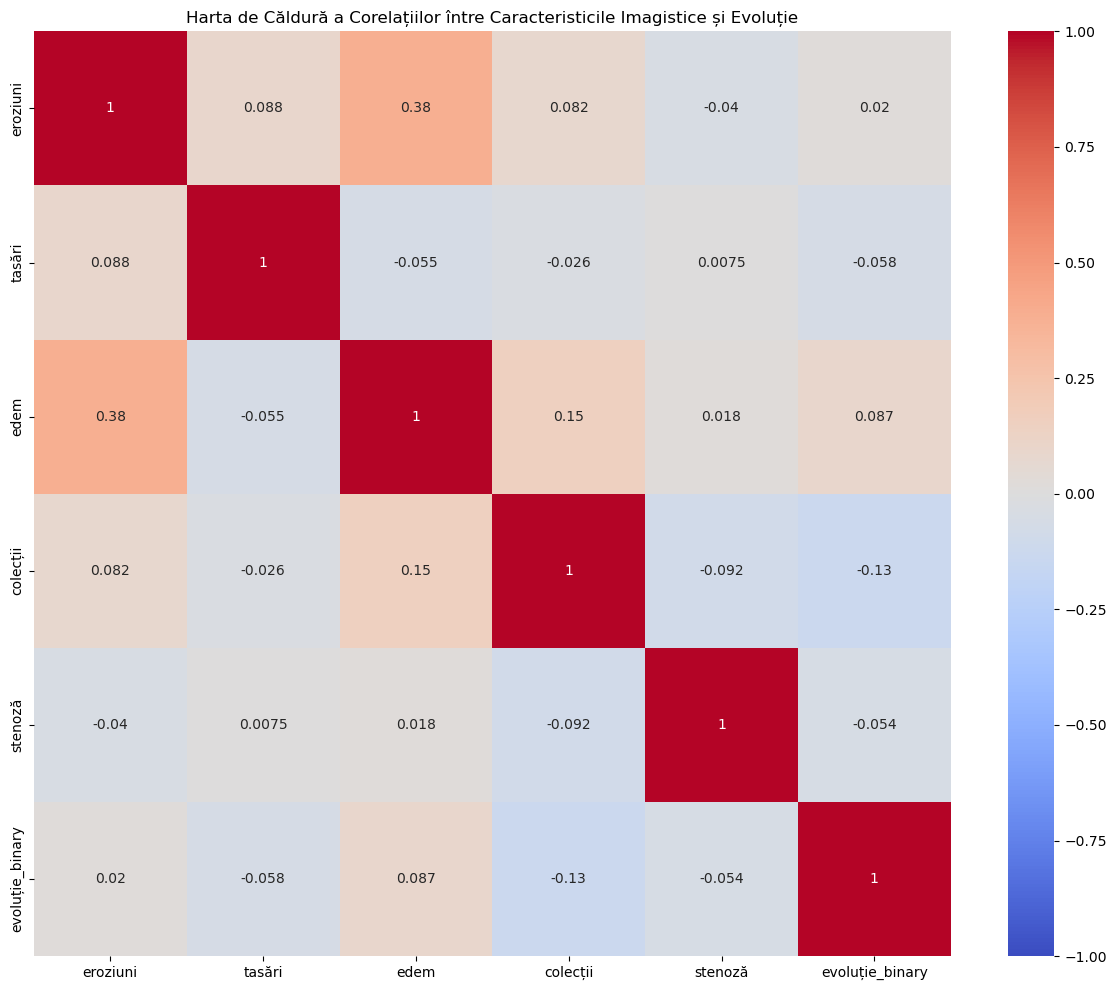


Tabel comasat de contingență pentru tratament:
  Caracteristică    Tratament  Absent & Fără Tratament  Absent & Cu Tratament  \
0       eroziuni   Antibiotic                       11                     76   
1         tasări   Antibiotic                       12                    128   
2           edem   Antibiotic                       14                     79   
3       colecții   Antibiotic                       15                    100   
4        stenoză   Antibiotic                       15                    133   
5       eroziuni  Chirurgical                       26                     61   
6         tasări  Chirurgical                       54                     86   
7           edem  Chirurgical                       26                     67   
8       colecții  Chirurgical                       41                     74   
9        stenoză  Chirurgical                       54                     94   

   Prezent & Fără Tratament  Prezent & Cu Tratament  
0     

In [4]:
# Inițializăm listele pentru a stoca rezultatele
contingency_tables = []
test_results = []
# Analizăm relația dintre caracteristicile imagistice și evoluția clinică
for char in imaging_chars:
    contingency, p_value, test_type = contingency_test(char, 'evoluție_binary')
    
    # Adăugăm tabelul de contingență la lista
    contingency_tables.append({
        'Caracteristică': char,
        'Absent & Nefavorabil': contingency.iloc[0, 0],
        'Absent & Favorabil': contingency.iloc[0, 1],
        'Prezent & Nefavorabil': contingency.iloc[1, 0],
        'Prezent & Favorabil': contingency.iloc[1, 1]
    })
    
    # Adăugăm rezultatul testului la lista
    test_results.append({
        'Caracteristică': char,
        'Test': test_type,
        'p-value': p_value
    })

# Creăm tabelele comasate
contingency_df = pd.DataFrame(contingency_tables)
test_results_df = pd.DataFrame(test_results)

# Afișăm tabelele comasate
print("Tabel comasat de contingență:")
print(contingency_df)
print("\nRezultate teste statistice:")
print(test_results_df)

# Vizualizăm relațiile folosind heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[imaging_chars + ['evoluție_binary']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Harta de Căldură a Corelațiilor între Caracteristicile Imagistice și Evoluție')
plt.tight_layout()
plt.show()

# Analiză suplimentară: Decizii de tratament bazate pe imagistică
df['tratament_antibiotic'] = df['tratament'].str.contains('antibioterapie', na=False).astype(int)
df['tratament_chirurgical'] = df['tratament'].str.contains('chirurgical', na=False).astype(int)

treatment_contingency_tables = []
treatment_test_results = []

for treatment in ['tratament_antibiotic', 'tratament_chirurgical']:
    for char in imaging_chars:
        contingency, p_value, test_type = contingency_test(char, treatment)
        
        # Adăugăm tabelul de contingență la lista
        treatment_contingency_tables.append({
            'Caracteristică': char,
            'Tratament': 'Antibiotic' if treatment == 'tratament_antibiotic' else 'Chirurgical',
            'Absent & Fără Tratament': contingency.iloc[0, 0],
            'Absent & Cu Tratament': contingency.iloc[0, 1],
            'Prezent & Fără Tratament': contingency.iloc[1, 0],
            'Prezent & Cu Tratament': contingency.iloc[1, 1]
        })
        
        # Adăugăm rezultatul testului la lista
        treatment_test_results.append({
            'Caracteristică': char,
            'Tratament': 'Antibiotic' if treatment == 'tratament_antibiotic' else 'Chirurgical',
            'Test': test_type,
            'p-value': p_value
        })

# Creăm tabelele comasate pentru tratament
treatment_contingency_df = pd.DataFrame(treatment_contingency_tables)
treatment_test_results_df = pd.DataFrame(treatment_test_results)

print("\nTabel comasat de contingență pentru tratament:")
print(treatment_contingency_df)
print("\nRezultate teste statistice pentru tratament:")
print(treatment_test_results_df)